# Modeling Low-Thrust Propulsion Systems

- Study the physics behind low-thrust propulsion, such as ion or Hall-effect thrusters.
- Implement thrust and mass flow rate equations in a simulation.
- Explore the trade-offs between thrust, fuel efficiency, and transfer time.

**Rocket Science** is about newton's law of motion

- First law: object remain at rest until force is apply to it.
- Second law: force require to move object depend on it mass, the greater the mass, the more force require to cause acceleration.
- Third law: every action there is equal and opposite reaction.

**Astrodynamic** is the calculation of object in space (planet, asteroid, comet, spacecraft).

**Low thrust propulsion:** Is essential for all space machine.

- *Auxiliary propulsion:* Use in keeping space systems in desire location or for orientation. E.g Reaction control, drag makeup, retro, etc.

- *Primary propulsion:* Include the moving of space vehicle from point-to-point in earth space as

- *Chemical propulsion:* Use hydrogen-oxygen and storable propellents.

- *Electric propulsion:* Low fuel consumption, fewer emission, less noise.

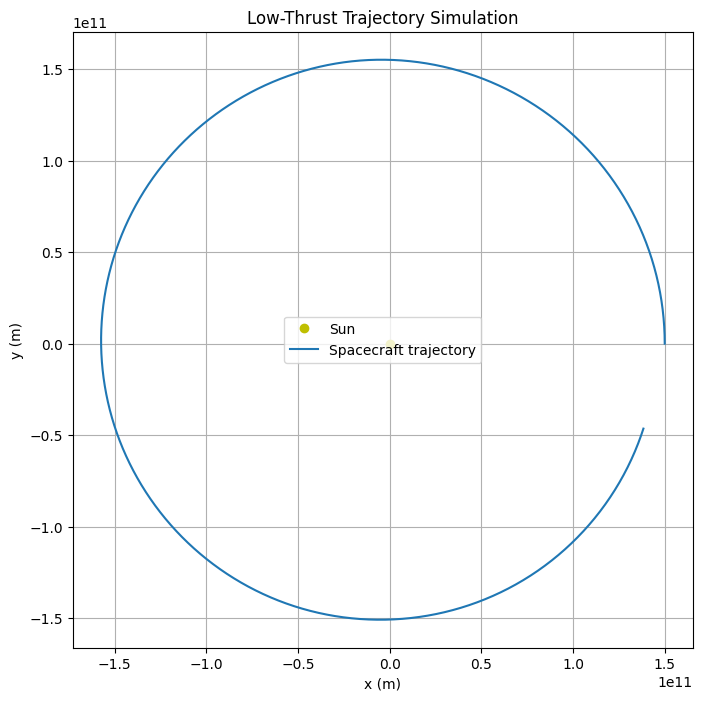

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun, kg
mu = G * M_sun    # Standard gravitational parameter for the Sun

# Spacecraft parameters
thrust = 0.1      # Continuous thrust (N)
mass = 500        # Spacecraft mass (kg)
acceleration = thrust / mass  # Thrust acceleration (m/s^2)

# F (thrust) = mass * acceleration

# Equations of motion
def equations_of_motion(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)

    # This is a simple simulation where thrust is
    # continuously applied along the radial direction.
    ax = -mu * x / r**3 + acceleration * x / r
    ay = -mu * y / r**3 + acceleration * y / r

    return [vx, vy, ax, ay]

# Initial conditions: circular orbit
r0 = 1.5e11  # Initial distance from Sun, m (1 AU)
v0 = np.sqrt(mu / r0)  # Circular orbit velocity, m/s
initial_state = [r0, 0, 0, v0]

# Time span for integration
time_span = (0, 3.154e7)  # One year in seconds
time_eval = np.linspace(*time_span, 1000)

# Numerical integration
solution = solve_ivp(
    equations_of_motion, time_span,
    initial_state, t_eval=time_eval, method='RK45'
)

# Extract trajectory
x, y = solution.y[0], solution.y[1]

# Plot the trajectory
plt.figure(figsize=(8, 8))
plt.plot(0, 0, 'yo', label='Sun')  # Sun at the origin
plt.plot(x, y, label='Spacecraft trajectory')
plt.axis('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Low-Thrust Trajectory Simulation')
plt.legend()
plt.grid()
# plt.show()
# plt.savefig('Low-Thrust Trajectory Simulation')

In [2]:
# To Compare Fuel Efficiency (Tsiolkovsky rocket equation)

exhaust_velocity = 3000  # m/s, assumed value for ion thrusters

# Before Optimization
eq_motion_before = equations_of_motion

# After Optimization (thrust in velocity direction)
def eq_motion_after(t, state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
    ax = -mu * x / r**3
    ay = -mu * y / r**3

    if v != 0:
        ax += acceleration * (vx / v)
        ay += acceleration * (vy / v)

    return [vx, vy, ax, ay]

# Run simulations
sol_before = solve_ivp(eq_motion_before, time_span, initial_state, max_step=1000)
sol_after = solve_ivp(eq_motion_after, time_span, initial_state, max_step=1000)

# Estimate delta-v from velocity difference
v_final_before = np.sqrt(sol_before.y[2, -1]**2 + sol_before.y[3, -1]**2)
v_final_after = np.sqrt(sol_after.y[2, -1]**2 + sol_after.y[3, -1]**2)

# Tsiolkovsky Rocket Equation
def fuel_used(delta_v, m0, ve):
    mf = m0 * np.exp(-delta_v / ve)
    return m0 - mf

fuel_before = fuel_used(v_final_before, mass, exhaust_velocity)
fuel_after = fuel_used(v_final_after, mass, exhaust_velocity)

# Print comparison
print(f"Delta-v Before Optimization: {v_final_before:.2f} m/s")
print(f"Fuel Used Before Optimization: {fuel_before:.2f} kg")

print(f"Delta-v After Optimization: {v_final_after:.2f} m/s")
print(f"Fuel Used After Optimization: {fuel_after:.2f} kg")

def optimized_thrust_direction(state):
    # Implement logic to determine optimal thrust direction
    # For example, align with velocity vector
    vx, vy = state[2], state[3]
    v_mag = np.sqrt(vx**2 + vy**2)
    return vx/v_mag, vy/v_mag

print(optimized_thrust_direction(initial_state))

Delta-v Before Optimization: 29453.40 m/s
Fuel Used Before Optimization: 499.97 kg
Delta-v After Optimization: 23070.96 m/s
Fuel Used After Optimization: 499.77 kg
(np.float64(0.0), np.float64(1.0))


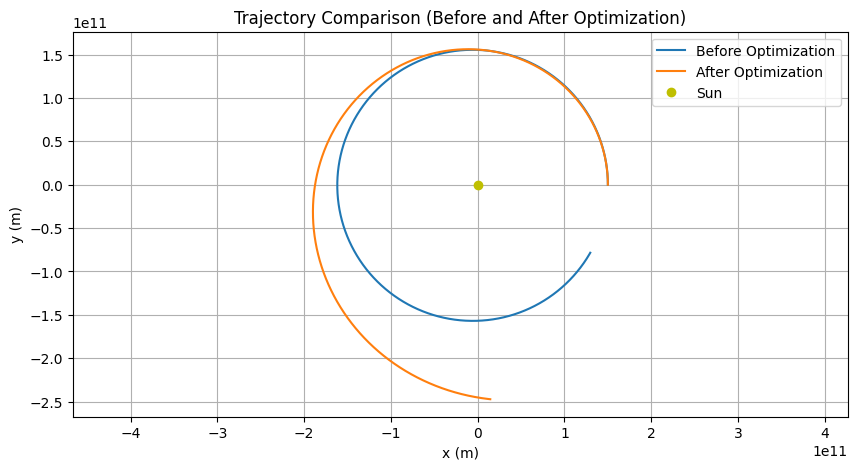

In [ ]:
# Plot the comparison

plt.figure(figsize=(10, 5))
plt.plot(sol_before.y[0], sol_before.y[1], label='Before Optimization')
plt.plot(sol_after.y[0], sol_after.y[1], label='After Optimization')
plt.plot(0, 0, 'yo', label='Sun')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()
plt.title(f'Trajectory Comparison (Before and After Optimization)')
plt.grid()
plt.axis('equal')
plt.show()

# 3D Trajectory

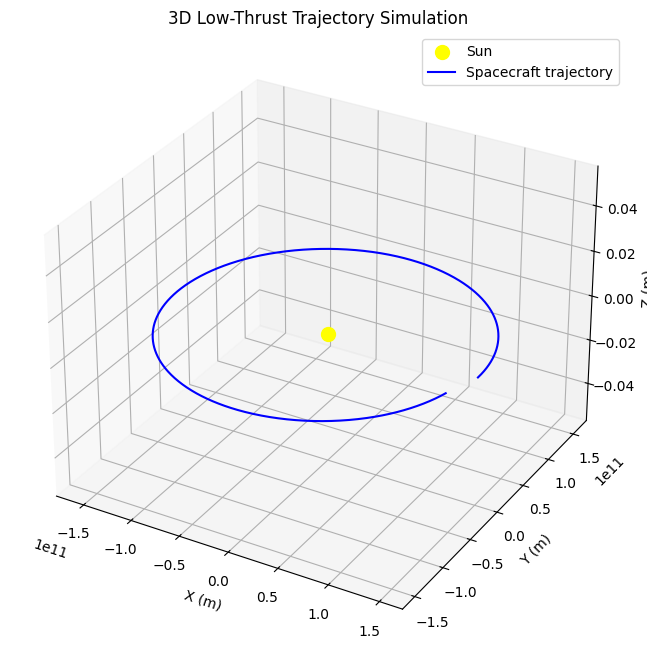

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M_sun = 1.989e30  # Mass of the Sun, kg
mu = G * M_sun    # Standard gravitational parameter for the Sun

# Spacecraft parameters
thrust = 0.1      # Continuous thrust (N)
mass = 500        # Spacecraft mass (kg)
acceleration = thrust / mass  # Thrust acceleration (m/s^2)

# Equations of motion in 3D
def equations_of_motion(t, state):
    x, y, z, vx, vy, vz = state
    r = np.sqrt(x**2 + y**2 + z**2)
    ax = -mu * x / r**3 + acceleration * x / r
    ay = -mu * y / r**3 + acceleration * y / r
    az = -mu * z / r**3 + acceleration * z / r
    return [vx, vy, vz, ax, ay, az]

# Initial conditions: circular orbit in the x-y plane, with initial z=0
r0 = 1.5e11  # Initial distance from Sun, m (1 AU)
v0 = np.sqrt(mu / r0)  # Circular orbit velocity, m/s
initial_state = [r0, 0, 0, 0, v0, 0]  # Initial z = 0

# Time span for integration
time_span = (0, 3.154e7)  # One year in seconds
time_eval = np.linspace(*time_span, 1000)

# Numerical integration
solution = solve_ivp(
    equations_of_motion, time_span, initial_state, t_eval=time_eval, method='RK45'
)

# Extract trajectory
x, y, z = solution.y[0], solution.y[1], solution.y[2]

# Plotting the trajectory in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sun at the origin
ax.scatter(0, 0, 0, color='yellow', s=100, label='Sun')

# Plot the spacecraft trajectory
ax.plot(x, y, z, label='Spacecraft trajectory', color='b')

# Labels and title
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Low-Thrust Trajectory Simulation')

# Show the legend and plot
ax.legend()
# plt.show()
# plt.savefig('3D Low-Thrust Trajectory Simulation')

# Why modeling low thrust propulsion sysytem?

Modeling low-thrust propulsion systems is crucial for several reasons:

### 1. Mission Planning and Optimization
Low-thrust propulsion systems, such as ion engines or Hall effect thrusters, are often used in space missions where fuel efficiency is critical. Modeling these systems helps mission planners optimize trajectories, reducing fuel consumption and increasing mission duration.

### 2. Performance Prediction and Verification
Accurate modeling of low-thrust propulsion systems enables engineers to predict their performance under various operating conditions. This helps verify that the system meets the required specifications and identifies potential issues before they become major problems.

### 3. Design and Sizing
Modeling low-thrust propulsion systems informs the design and sizing of the system's components, such as the power processing unit, propellant management system, and thruster itself. This ensures that the system is properly sized for the mission requirements.

### 4. Thruster Liftoff and Shutdown
Low-thrust propulsion systems often require careful management of thruster liftoff and shutdown to prevent damage or instability. Modeling these events helps engineers develop strategies for safe and reliable operation.

### 5. Integration with Other Spacecraft Systems
Low-thrust propulsion systems interact with other spacecraft systems, such as power, communication, and navigation. Modeling these interactions ensures that the propulsion system is properly integrated with the rest of the spacecraft.

### 6. Reducing Development Costs and Risks
By modeling low-thrust propulsion systems, engineers can reduce development costs and risks associated with building and testing physical prototypes.

### 7. Improving Navigation and Control
Modeling low-thrust propulsion systems helps improve navigation and control algorithms, enabling more precise control of the spacecraft's trajectory and attitude.

### 8. Enhancing Robustness and Fault Tolerance
By simulating various failure scenarios and fault conditions, engineers can design low-thrust propulsion systems that are more robust and fault-tolerant.

### 9. Optimizing Propellant Utilization
Modeling low-thrust propulsion systems enables engineers to optimize propellant utilization, reducing waste and increasing the overall efficiency of the system.

### 10. Supporting Future Mission Concepts
Finally, modeling low-thrust propulsion systems supports the development of future mission concepts, such as deep space exploration and asteroid deflection.

By modeling low-thrust propulsion systems, engineers can create more efficient, reliable, and robust spacecraft that can accomplish a wide range of missions.

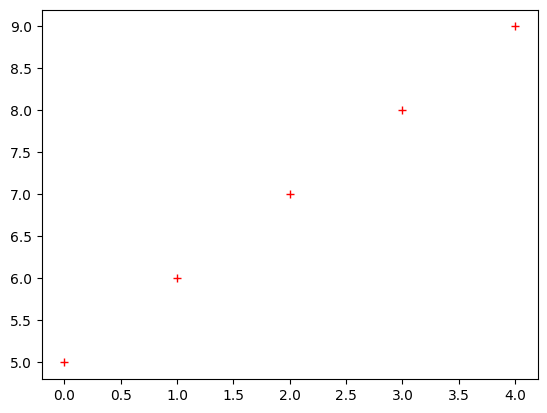

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,1,2,3,4])
y = np.array([5,6,7,8,9])

plt.plot(x,y, 'r+')
plt.draw()
# print(help(plt.plot))